# Chapter 4, Exercise 13

#### (a) some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

In [65]:
library(ISLR)
library(MASS)
library(class)
library(naivebayes)

naivebayes 0.9.7 loaded



In [51]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

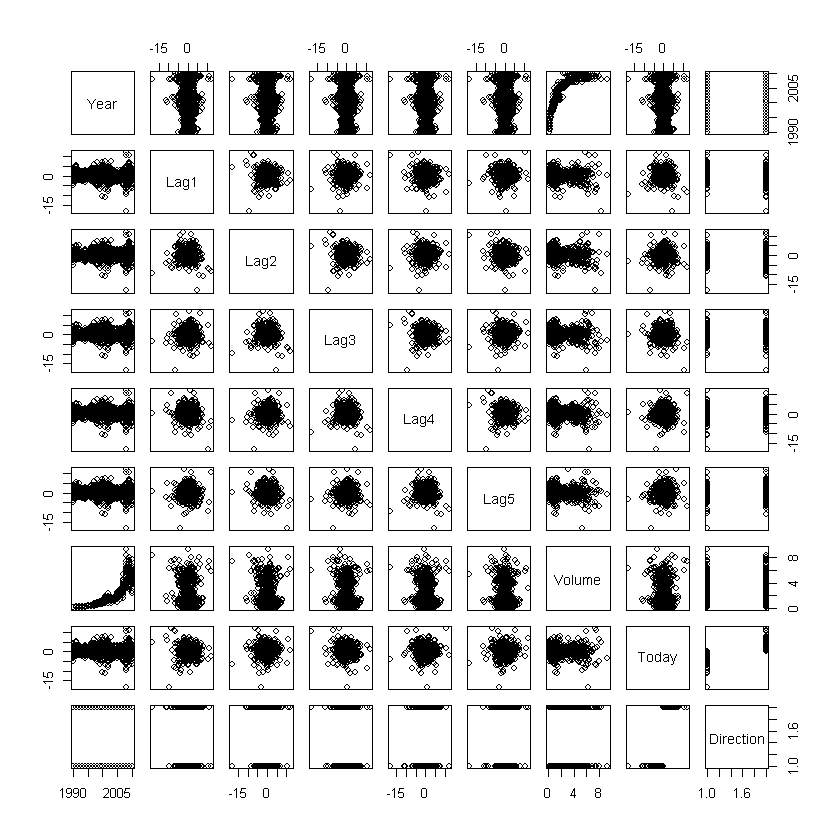

In [4]:
pairs(Weekly)

No obvious patterns are observed  
However `volumn` increased exponentially over `year`

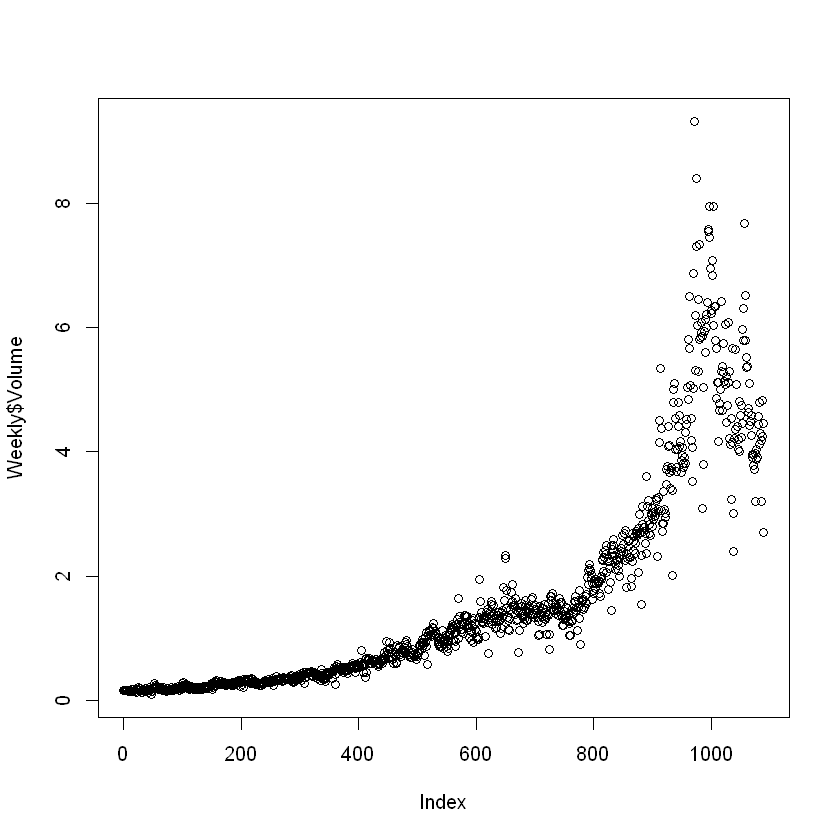

In [10]:
plot(Weekly$Volume)

In [11]:
cor(Weekly$Volume, Weekly$Year)

[1] 0.8419416

`Volumn` and `Year` seem to have strong correlation.

#### (b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [186]:
glm_fit <- glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, data=Weekly, family="binomial")
summary(glm_fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Lag2  
It shows p-value < 0.05 which is an evidence to reject the null hypothesis that it is not related to `Direction`

#### (c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression

In [30]:
prob <- predict(glm_fit, type="response")

preds <- ifelse(prob>.5, "Up", "Down")

conf <- table(preds, Weekly$Direction)
conf

      
preds  Down  Up
  Down   54  48
  Up    430 557

In [34]:
TP <- conf["Up", "Up"]
TN <- conf["Down", "Down"]
FP <- conf["Down", "Up"]
FN <- conf["Up", "Down"]
print(paste("Accuracy: ", (TP+TN)/(TP+TN+FP+FN)))

[1] "Accuracy:  0.561065197428834"


Model performance is really poor as it only predicts correctly 56% of the time, which is almost close to the random guesses.  
The model predicts well when market is `Up`, however it predicts poorly when the market is `Down`.  


#### (d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [66]:
train_range <- (Weekly$Year <= 2008)
train <- Weekly[train_range,]
test <- Weekly[!train_range,]

train_y <- train$Direction
test_y <- test$Direction

In [67]:
glm_fit <- glm(train_y ~ Lag2, data=train, family="binomial")
prob <- predict(glm_fit, test, type="response")

preds <- ifelse(prob>.5, "Up", "Down")

conf <- table(preds, test_y)
conf

      test_y
preds  Down Up
  Down    9  5
  Up     34 56

In [68]:
TP <- conf["Up", "Up"]
TN <- conf["Down", "Down"]
FP <- conf["Down", "Up"]
FN <- conf["Up", "Down"]
print(paste("Accuracy: ", (TP+TN)/(TP+TN+FP+FN)))

[1] "Accuracy:  0.625"


#### (e) Repeat (d) using LDA.

In [69]:
lda_fit <- lda(train_y ~ Lag2, data=train)
preds <- predict(lda_fit, test)


conf <- table(preds$class, test$Direction)
conf

      
       Down Up
  Down    9  5
  Up     34 56

In [70]:
TP <- conf["Up", "Up"]
TN <- conf["Down", "Down"]
FP <- conf["Down", "Up"]
FN <- conf["Up", "Down"]
print(paste("Accuracy: ", (TP+TN)/(TP+TN+FP+FN)))

[1] "Accuracy:  0.625"


#### (f) Repeat (d) using QDA.

In [71]:
qda_fit <- qda(train_y ~ Lag2, data=train)
preds <- predict(qda_fit, test)

conf <- table(preds$class, test$Direction)
conf

      
       Down Up
  Down    0  0
  Up     43 61

In [72]:
TP <- conf["Up", "Up"]
TN <- conf["Down", "Down"]
FP <- conf["Down", "Up"]
FN <- conf["Up", "Down"]
print(paste("Accuracy: ", (TP+TN)/(TP+TN+FP+FN)))

[1] "Accuracy:  0.586538461538462"


#### (g) repeat (d) using KNN with K = 1.

In [73]:
train_x <- as.matrix(train$Lag2)
test_x <- as.matrix(test$Lag2)
set.seed(1)

knn_pred <- knn(train_x, test_x, train_y, k = 1)
conf <- table(knn_pred, test$Direction)
conf

        
knn_pred Down Up
    Down   21 30
    Up     22 31

In [74]:
TP <- conf["Up", "Up"]
TN <- conf["Down", "Down"]
FP <- conf["Down", "Up"]
FN <- conf["Up", "Down"]
print(paste("Accuracy: ", (TP+TN)/(TP+TN+FP+FN)))

[1] "Accuracy:  0.5"


#### (h) Repeat (d) using naive Bayes.

In [89]:
bayes_fit <- naive_bayes(train_y ~ Lag2, data = train) 
pred <- predict(bayes_fit, test)
conf <- table(pred, test$Direction)
conf

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."


      
pred   Down Up
  Down    0  0
  Up     43 61

In [90]:
TP <- conf["Up", "Up"]
TN <- conf["Down", "Down"]
FP <- conf["Down", "Up"]
FN <- conf["Up", "Down"]
print(paste("Accuracy: ", (TP+TN)/(TP+TN+FP+FN)))

[1] "Accuracy:  0.586538461538462"


#### (i) Which of these methods appears to provide the best results on this data?

`Logistic Regression` and `LDA` show best performance.  
  
`QDA` and `Bayes` are not very good  
  
`KNN` with K=1 shows the worst performance  

#### (j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

In [172]:
train_x <- as.matrix(train$Lag2, sqrt(abs(train$Lag1)))
test_x <- as.matrix(test$Lag2, sqrt(abs(train$Lag1)))

for (k in 2:15) {
    knn_pred <- knn(train_x, test_x, train_y, k = k)
    conf <- table(knn_pred, test_y)
    print(paste("K=",k, mean(knn_pred==test_y)))
}

[1] "K= 2 0.509615384615385"
[1] "K= 3 0.548076923076923"
[1] "K= 4 0.615384615384615"
[1] "K= 5 0.538461538461538"
[1] "K= 6 0.538461538461538"
[1] "K= 7 0.538461538461538"
[1] "K= 8 0.528846153846154"
[1] "K= 9 0.557692307692308"
[1] "K= 10 0.548076923076923"
[1] "K= 11 0.557692307692308"
[1] "K= 12 0.557692307692308"
[1] "K= 13 0.596153846153846"
[1] "K= 14 0.567307692307692"
[1] "K= 15 0.586538461538462"


In [173]:
set.seed(1)
knn_pred <- knn(train_x, test_x, train_y, k = 4)
conf <- table(knn_pred, test_y)
conf

        test_y
knn_pred Down Up
    Down   20 17
    Up     23 44

In [174]:
print(paste("Accuracy: ", mean(knn_pred==test_y)))

[1] "Accuracy:  0.615384615384615"


between K = 1 to 15, KNN with K=4 shows the best performance.
Its performance is almost equal to lda

In [175]:
# qda with different vars
qda_fit <- qda(train_y ~ Lag2 + sqrt(abs(Lag1)), data=train)
preds <- predict(qda_fit, test)

conf <- table(preds$class, test_y)
conf

      test_y
       Down Up
  Down    0  0
  Up     43 61

In [176]:
print(paste("Accuracy: ", mean(preds$class==test_y)))

[1] "Accuracy:  0.586538461538462"


In [177]:
# logistic regression with different model
glm_fit <- glm(train_y ~ Lag2 + sqrt(abs(Lag1)), data=train, family="binomial")
prob <- predict(glm_fit, test, type="response")

preds <- ifelse(prob>.5, "Up", "Down")

conf <- table(preds, test_y)
conf

      test_y
preds  Down Up
  Down    9  4
  Up     34 57

In [179]:
print(paste("Accuracy: ",  mean(preds==test_y)))

[1] "Accuracy:  0.634615384615385"


This model performs slightly better than `LDA` and `Logistic Regression` with single variable `Lag2`

Since variable `Lag2 + sqrt(abs(Lag1))` shows better result, we will try `KNN` with this.

In [182]:
train_x <- cbind(train$Lag2, sqrt(abs(train$Lag1)))
test_x <- cbind(test$Lag2, sqrt(abs(test$Lag1)))
set.seed(1)
for (k in 2:15) {
    set.seed(1)
    knn_pred <- knn(train_x, test_x, train_y, k = k)
    print(paste("K=",k, mean(knn_pred==test_y)))
}

[1] "K= 2 0.509615384615385"
[1] "K= 3 0.519230769230769"
[1] "K= 4 0.548076923076923"
[1] "K= 5 0.596153846153846"
[1] "K= 6 0.576923076923077"
[1] "K= 7 0.615384615384615"
[1] "K= 8 0.519230769230769"
[1] "K= 9 0.625"
[1] "K= 10 0.596153846153846"
[1] "K= 11 0.605769230769231"
[1] "K= 12 0.538461538461538"
[1] "K= 13 0.625"
[1] "K= 14 0.586538461538462"
[1] "K= 15 0.596153846153846"


Now, `KNN` with K=9 and K=13 performs almost similar to the `LDA` and `Logistic Regression`

In [186]:
set.seed(1)
knn_pred <- knn(train_x, test_x, train_y, k = 9)
conf <- table(knn_pred, test_y)
conf

        test_y
knn_pred Down Up
    Down   23 19
    Up     20 42

In [187]:
print(paste("Accuracy (K = 9): ",  mean(knn_pred==test_y)))

[1] "Accuracy (K = 9):  0.625"


In [188]:
set.seed(1)
knn_pred <- knn(train_x, test_x, train_y, k = 13)
conf <- table(knn_pred, test_y)
conf

        test_y
knn_pred Down Up
    Down   21 17
    Up     22 44

In [189]:
print(paste("Accuracy (K = 13): ",  mean(knn_pred==test_y)))

[1] "Accuracy (K = 13):  0.625"


# Chapter 4, Exercise 14

In [165]:
library(MASS)
library(class)
library(repr)
library(naivebayes)

In [45]:
Auto = read.csv("C:/Users/Daniel Choi/Desktop/comp-coursework/COMP4432/HW2/Auto.csv", na.strings="?")

In [52]:
Auto = na.omit(Auto)
summary(Auto)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
  acceleration        year           origin          name          
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   Length:392        
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   Class :character  
 Median :15.50   Median :76.00   Median :1.000   Mode  :character  
 Mean   :15.54   Mean   :75.98   Mean   :1.577                     
 3rd Qu.:17.02   3rd Qu.:79.00   3rd Qu.:2.000                     
 Max.   :24.80   Max.   :82.00  

#### (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [63]:
df <- data.frame(Auto[,-9])
df["mpg01"] <- ifelse(df["mpg"] > median(df$mpg), 1, 0)
df[10:20, ]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,"<dbl[,1]>"
10,15,8,390,190,3850,8.5,70,1,0
11,15,8,383,170,3563,10.0,70,1,0
12,14,8,340,160,3609,8.0,70,1,0
13,15,8,400,150,3761,9.5,70,1,0
14,14,8,455,225,3086,10.0,70,1,0
15,24,4,113,95,2372,15.0,70,3,1
16,22,6,198,95,2833,15.5,70,1,0
17,18,6,199,97,2774,15.5,70,1,0
18,21,6,200,85,2587,16.0,70,1,0


#### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

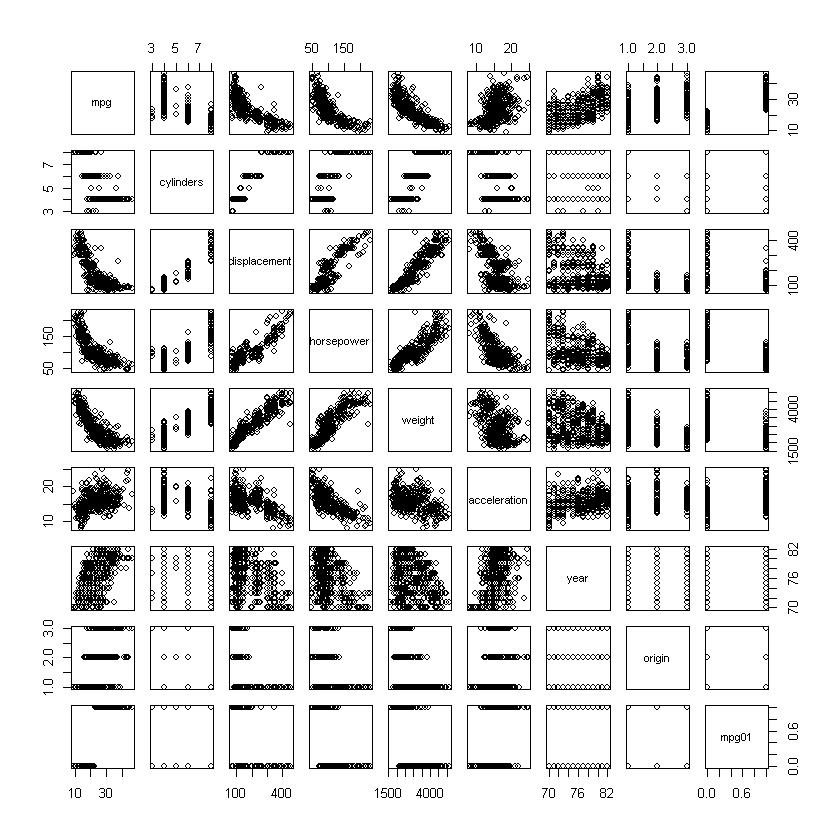

In [64]:
pairs(df)

In [65]:
cor(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088,0.8369392
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316,-0.7591939
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351,-0.7534766
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715,-0.6670526
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054,-0.7577566
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458,0.3468215
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277,0.4299042
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000,0.5136984
mpg01,0.8369392,-0.7591939,-0.7534766,-0.6670526,-0.7577566,0.3468215,0.4299042,0.5136984,1.0000000


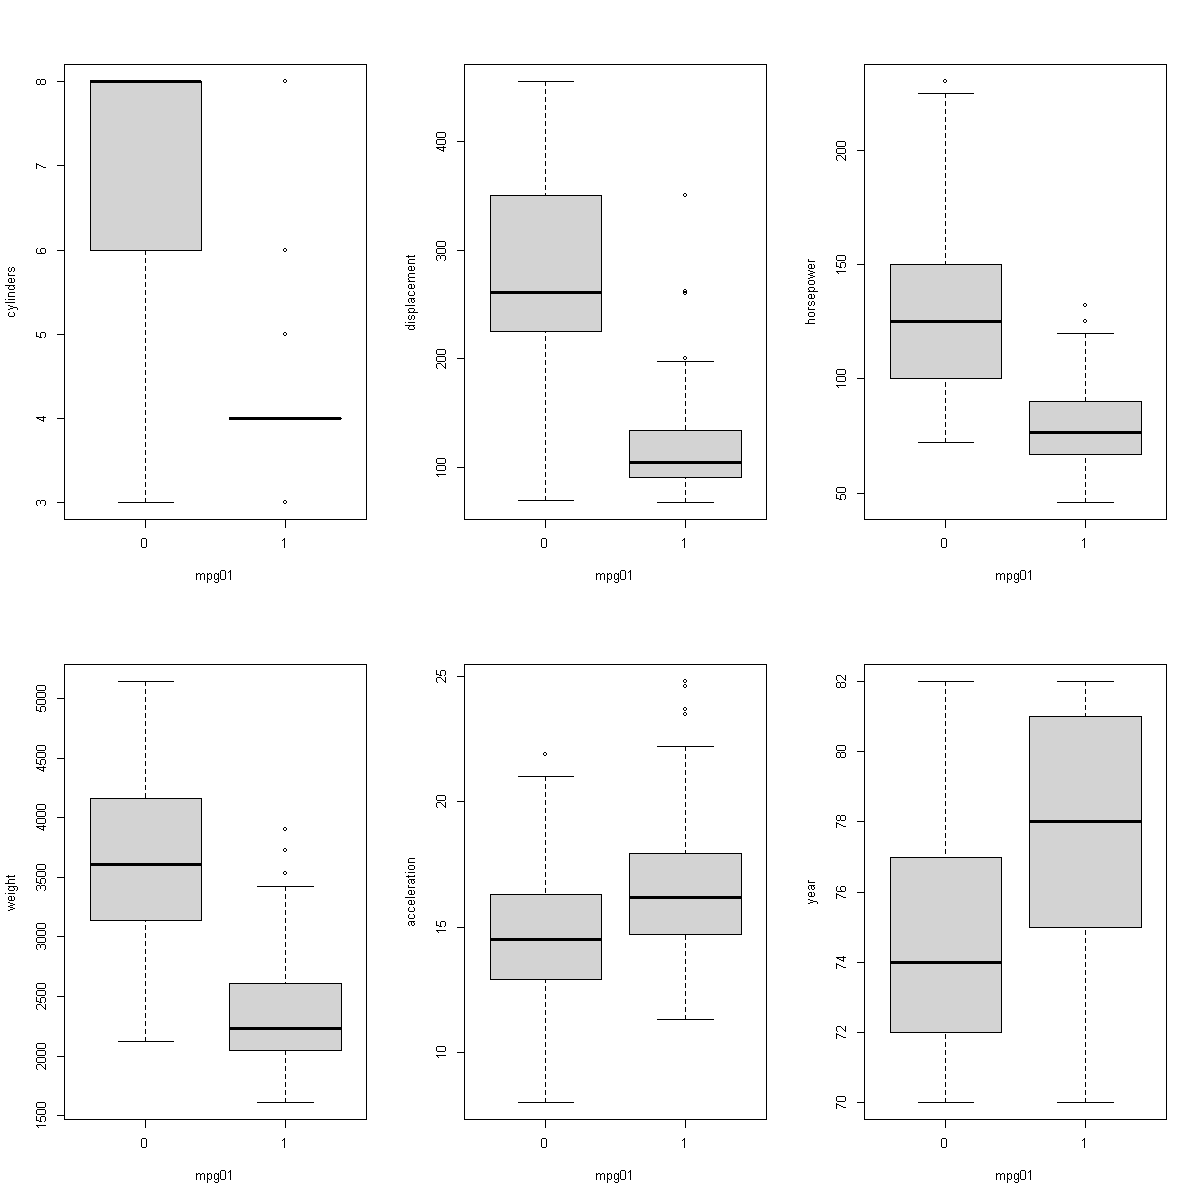

In [80]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow = c(2, 3))
plot(factor(df$mpg01), df$cylinders, ylab = "cylinders", xlab = "mpg01")
plot(factor(df$mpg01), df$displacement, ylab = "displacement", xlab = "mpg01")
plot(factor(df$mpg01), df$horsepower, ylab = "horsepower", xlab = "mpg01")
plot(factor(df$mpg01), df$weight, ylab = "weight", xlab = "mpg01")
plot(factor(df$mpg01), df$acceleration, ylab = "acceleration", xlab = "mpg01")
plot(factor(df$mpg01), df$year, ylab = "year", xlab = "mpg01")

By looking at the corrleation matrix, `cylinders`, `displacement`, `horsepower`, and `weight` are inversely correlated to `mpg01`.   

#### (c) Split the data into a training set and a test set.

In [148]:
set.seed(1)
auto_sample = sample(dim(df)[1], size = 0.5*dim(df)[1])

train = df[auto_sample,]
test = df[-auto_sample,]

In [163]:
head(train)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,"<dbl[,1]>"
326,44.3,4,90,48,2085,21.7,80,2,1
169,23.0,4,140,83,2639,17.0,75,1,1
131,26.0,4,122,80,2451,16.5,74,1,1
301,23.9,8,260,90,3420,22.2,79,1,1
272,23.2,4,156,105,2745,16.7,78,1,1
189,16.0,8,318,150,4190,13.0,76,1,0


In [150]:
head(test)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,"<dbl[,1]>"
2,15,8,350,165,3693,11.5,70,1,0
3,18,8,318,150,3436,11.0,70,1,0
4,16,8,304,150,3433,12.0,70,1,0
5,17,8,302,140,3449,10.5,70,1,0
6,15,8,429,198,4341,10.0,70,1,0
7,14,8,454,220,4354,9.0,70,1,0


#### (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [151]:
lda_fit <- lda(train$mpg01 ~ cylinders+horsepower+weight+acceleration, data=train)
preds <- predict(lda_fit, test)

conf <- table(preds$class, test$mpg01)
conf

   
     0  1
  0 87  9
  1 15 85

In [152]:
print(paste("Test Error: ", mean(preds$class != test$mpg01)))

[1] "Test Error:  0.122448979591837"


#### (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [155]:
qda_fit <- qda(train$mpg01 ~ cylinders+horsepower+weight+acceleration, data=train)
preds <- predict(qda_fit, test)

conf <- table(preds$class, test$mpg01)
conf

   
     0  1
  0 88 10
  1 14 84

In [156]:
print(paste("Test Error: ", mean(preds$class != test$mpg01)))

[1] "Test Error:  0.122448979591837"


#### (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [153]:
glm_fit <- glm(train$mpg01 ~ cylinders+horsepower+weight+acceleration, data=train, family="binomial")

prob <- predict(glm_fit, test, type="response")
preds <- ifelse(prob>.5, 1, 0)

conf <- table(preds, test$mpg01)
conf

     
preds  0  1
    0 89  9
    1 13 85

In [154]:
TP <- conf['1', '1']
TN <- conf['0', '0']
FP <- conf['0', '1']
FN <- conf['1', '0']

print(paste("Test Eror: ", 1 - (TP+TN)/(TP+TN+FP+FN)))

[1] "Test Eror:  0.112244897959184"


#### (g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [159]:
bayes_fit <- naive_bayes(as.factor(train$mpg01) ~ cylinders+horsepower+weight+acceleration, data = train) 
pred <- predict(bayes_fit, test)
conf <- table(pred, test$mpg01)
conf

Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."


    
pred  0  1
   0 88  9
   1 14 85

In [160]:
TP <- conf['1', '1']
TN <- conf['0', '0']
FP <- conf['0', '1']
FN <- conf['1', '0']

print(paste("Test Eror: ", 1 - (TP+TN)/(TP+TN+FP+FN)))

[1] "Test Eror:  0.11734693877551"


#### (h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [178]:
set.seed(1)
for (k in c(1,2,3,5,7,10,20,50)) {
    knn_pred <- knn(train[2:5], test[2:5], train$mpg01, k = k)
    conf <- table(knn_pred, test$mpg01)
    print(paste("Test Error with K =",k, ": ", mean(knn_pred!=test$mpg01)))
}

[1] "Test Error with K = 1 :  0.178571428571429"
[1] "Test Error with K = 2 :  0.168367346938776"
[1] "Test Error with K = 3 :  0.122448979591837"
[1] "Test Error with K = 5 :  0.127551020408163"
[1] "Test Error with K = 7 :  0.122448979591837"
[1] "Test Error with K = 10 :  0.11734693877551"
[1] "Test Error with K = 20 :  0.127551020408163"
[1] "Test Error with K = 50 :  0.13265306122449"


`KNN` with K=10 seems to perform the best

# Chapter 5, Exercise 2

#### (a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.


Every observation have an equal probability of being selected. Which gives 

$$\frac 1 n$$
  
Since it is probability of `not` selecting the observation, Negation gives the answer, which is 

  $$1 - \frac 1 n$$


####  (b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?


It is still
  $$1 - \frac 1 n$$

Because bootstarp is resamples `with replacement`

#### (c) Argue that the probability that the jth observation is not in the bootstrap sample is (1 − 1/n)^n.


Since the bootstrap sampling is doing the replacement, every event is independent of each other.
  
Now, bootstrap chooses `n` samples.
  
'jth observation not in the bootstrap sample' means the jth sample was not picked for `n` times.

Therefore, 
  $$(1 - \frac 1 n)^n$$

#### (d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?


  $$1 - (1 - \frac 1 5)^5 = 0.6723$$

#### (e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?


  $$1 - (1 - \frac 1 {100})^{100} = 0.6340$$

#### (f) When n = 10,000, what is the probability that the jth observation is in the bootstrap sample?


  $$1 - (1 - \frac 1 {10000})^{10000} = 0.6321$$

#### (g) Create a plot that displays, for each integer value of n from 1 to 100,000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.


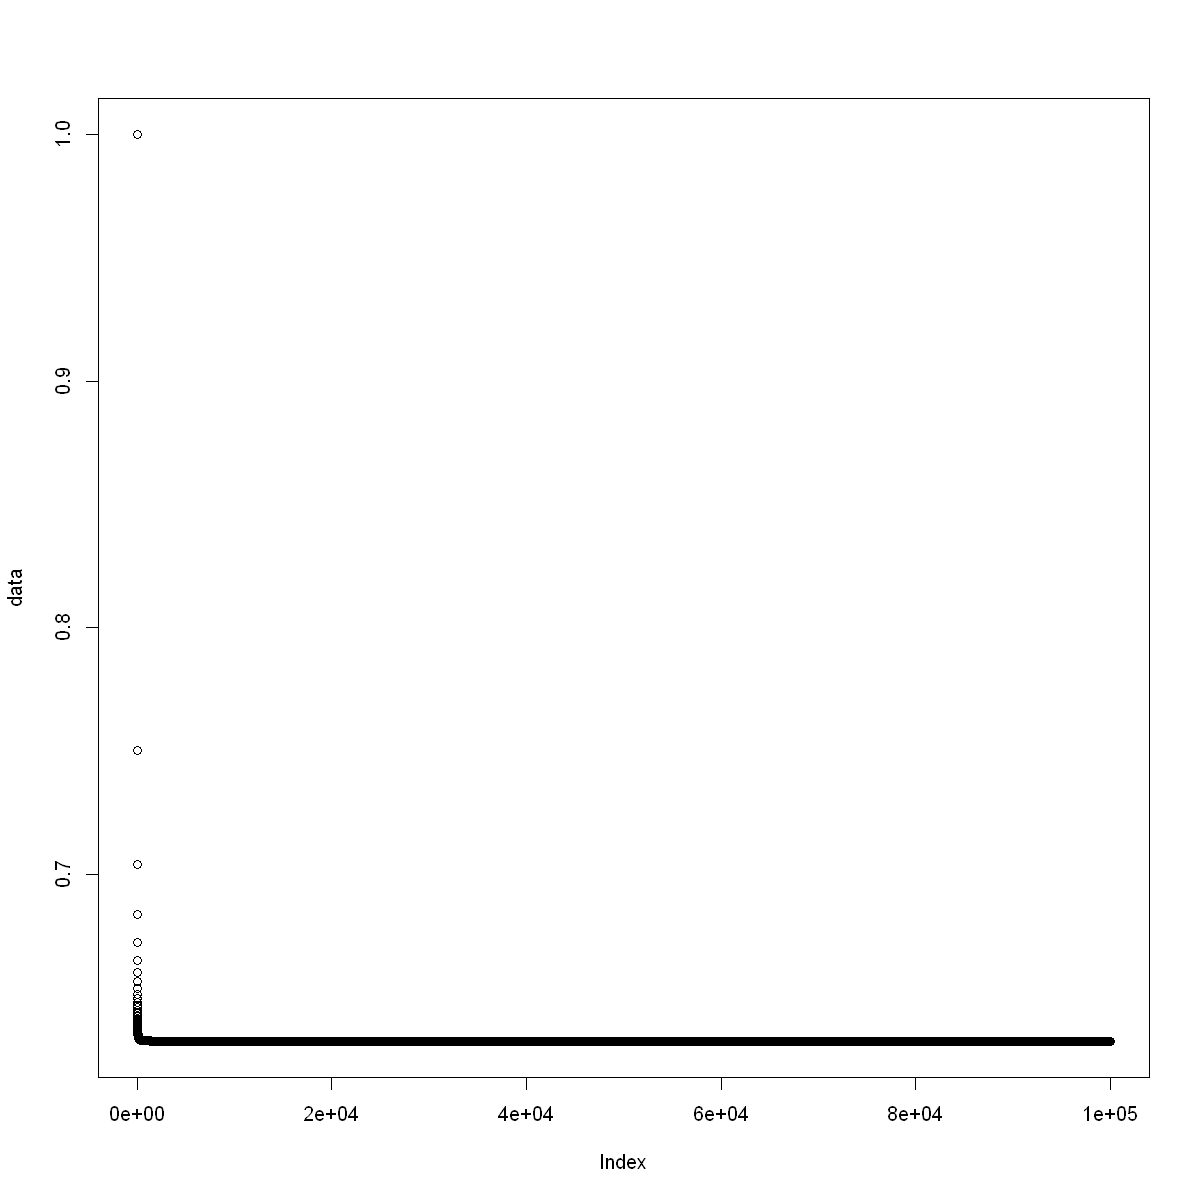

In [321]:
data = c(1:100000)
for (i in 1:100000) {
    data[i] = 1 - (1-(1/i))**i
}
plot(data)

The probabilty converge to `0.632` very quickly as `n` grows

#### (h) We will now investigate numerically the probability that a bootstrap sample of size n = 100 contains the jth observation. Here j = 4. We repeatedly create bootstrap samples, and each time we record whether or not the fourth observation is contained in the bootstrap sample.

In [305]:
set.seed(1)
store <- rep (NA, 10000)
for (i in 1:10000){
    store[i] <- sum (sample (1:100, rep=TRUE) == 4) > 0
}
mean (store)

[1] 0.6417

This creates 10,000 bootstrap samples from 1 to 100, then calculate if each sample contains 4.

With the assumption that (g) is correct, nearly `63.2%` of them will have 4.

Which seems to be true with `64.17%` containing 4.

# Chapter 5, Exercise 5

In [179]:
library(ISLR)

#### (a) Fit a logistic regression model that uses `income` and `balance` to predict `default`

In [195]:
glm_fit = glm(default ~ income + balance, data = Default, family = "binomial")

#### (b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

##### i. Split the sample set into a training set and a validation set.

In [215]:
set.seed(1)
auto_sample = sample(dim(Default)[1], size = 0.5*dim(Default)[1])

train = Default[auto_sample,]
test = Default[-auto_sample,]

In [206]:
dim(train)
head(train)

[1] 5000    4

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1017,No,No,939.0985,45519.02
8004,No,Yes,397.5425,22710.87
4775,Yes,No,1511.6110,53506.94
9725,No,No,301.3194,51539.95
8462,No,No,878.4461,29561.78
4050,Yes,No,1673.4863,49310.33


In [207]:
dim(test)
head(test)

[1] 5000    4

,default,student,balance,income
,<fct>,<fct>,<dbl>,<dbl>
1,No,No,729.5265,44361.63
2,No,Yes,817.1804,12106.13
3,No,No,1073.5492,31767.14
5,No,No,785.6559,38463.50
8,No,Yes,808.6675,17600.45
9,No,No,1161.0579,37468.53


##### ii. Fit a multiple logistic regression model using only the training observations.

In [216]:
glm_fit = glm(default ~ income + balance, data = train, family = "binomial")

##### iii. Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.

In [217]:
prob <- predict(glm_fit, test, type="response")
preds <- ifelse(prob>.5, "Yes", "No")

##### iv. Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.

In [218]:
mean(preds != test$default)

[1] 0.0254

#### (c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

In [220]:
result <- c(0:3)
result[1] = 0.0254
for (s in 2:4) {
    set.seed(s)
    auto_sample = sample(dim(Default)[1], size = 0.5*dim(Default)[1])

    train = Default[auto_sample,]
    test = Default[-auto_sample,]
    glm_fit = glm(default ~ income + balance, data = train, family = "binomial")
    prob <- predict(glm_fit, test, type="response")
    preds <- ifelse(prob>.5, "Yes", "No")
    result[s] = mean(preds != test$default)
}
result

[1] 0.0254 0.0238 0.0264 0.0256

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0238  0.0250  0.0255  0.0253  0.0258  0.0264 

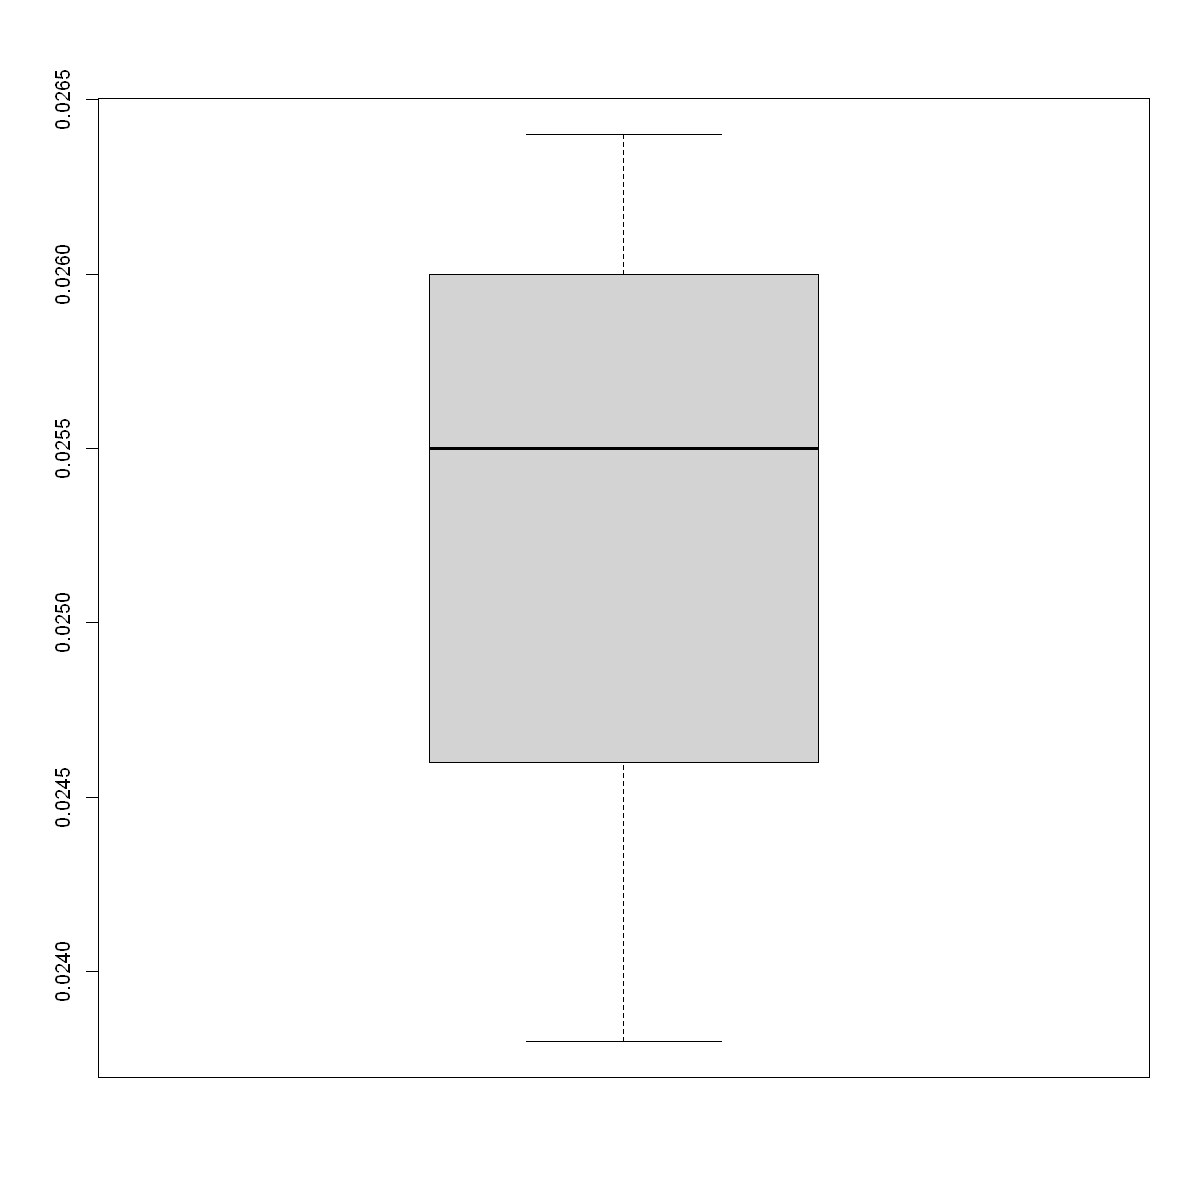

In [229]:
boxplot(result)
summary(result)

The average test error is `0.0253`.   
The validation set approach fairly remained consistent as test errors vary by `11%`

#### (d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate

In [231]:
dummy_result <- c(0:3)
for (s in 1:4) {
    set.seed(s)
    auto_sample = sample(dim(Default)[1], size = 0.5*dim(Default)[1])

    train = Default[auto_sample,]
    test = Default[-auto_sample,]
    glm_fit = glm(default ~ ., data = train, family = "binomial")
    prob <- predict(glm_fit, test, type="response")
    preds <- ifelse(prob>.5, "Yes", "No")
    dummy_result[s] = mean(preds != test$default)
}
dummy_result

[1] 0.0260 0.0246 0.0272 0.0262

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02460 0.02565 0.02610 0.02600 0.02645 0.02720 

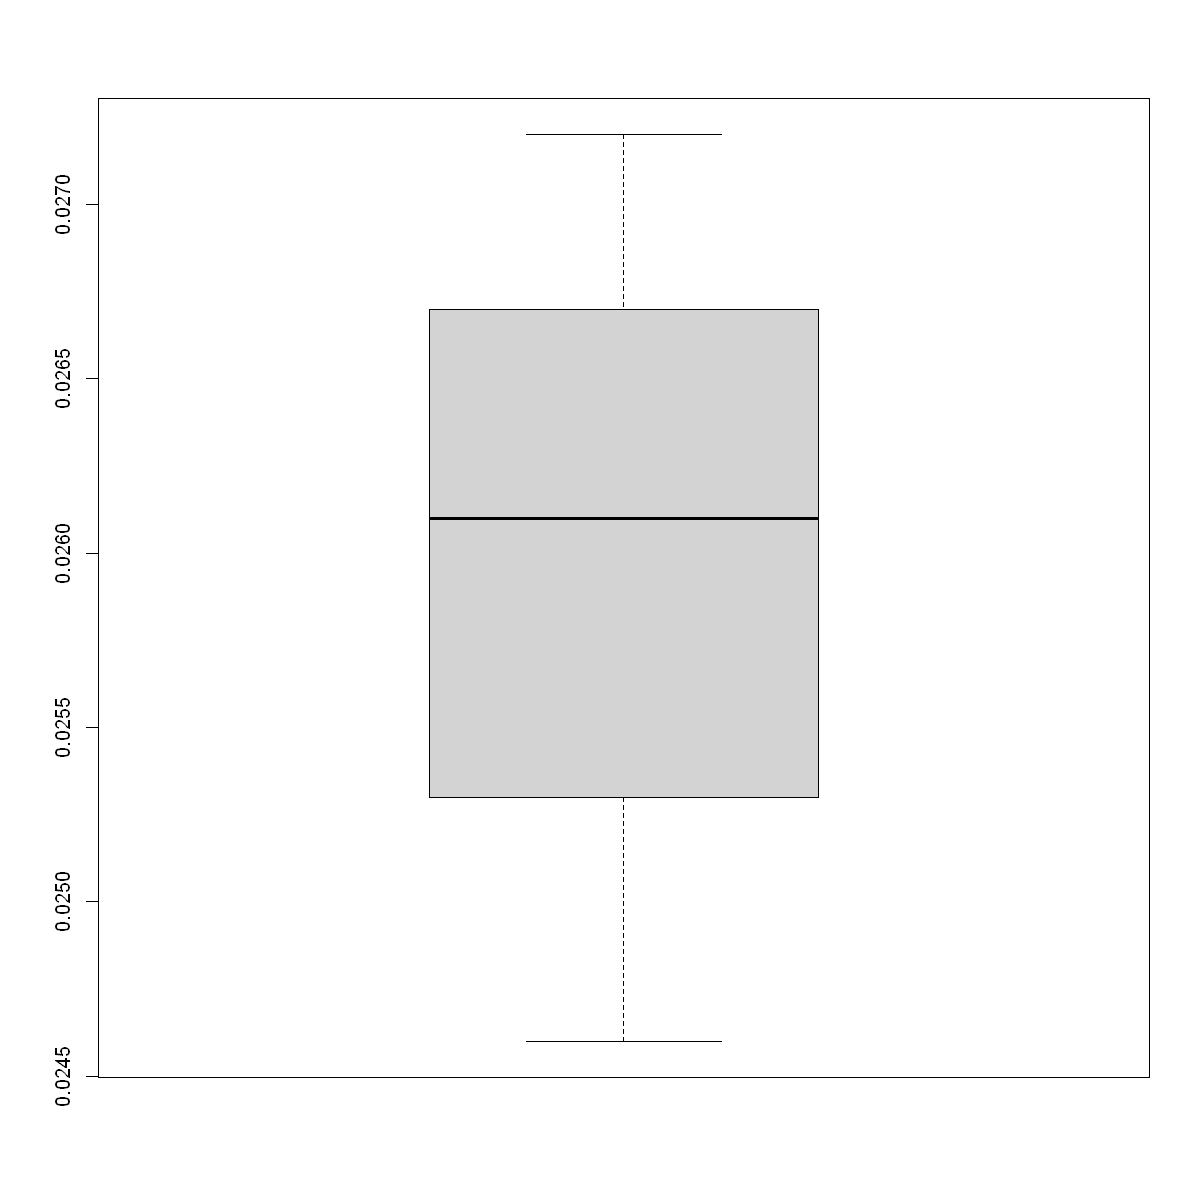

In [233]:
boxplot(dummy_result)
summary(dummy_result)

Average test error increased by `2.8%` (from 0.0253 to 0.02600).  
Including a dummy variable for `student` *does not* reduce the test error rate.

# Chapter 5, Exercise 6

In [235]:
library(boot)

In [259]:
set.seed(1)

#### (a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.

In [262]:
glm_fit = glm(default ~ income + balance, data = Default, family = "binomial")
summary(glm_fit)


Call:
glm(formula = default ~ income + balance, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


In [263]:
summary(glm_fit)$coefficients[,2]

(Intercept)       income      balance 
4.347564e-01 4.985167e-06 2.273731e-04

#### (b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.



In [254]:
boot.fn <- function(d, index) {
    glm_fit = glm(default ~ income + balance, data = d[index,], family = "binomial")
    return (glm_fit$coefficients)
}

(Intercept)        income       balance 
-1.154047e+01  2.080898e-05  5.647103e-03

####  (c) Use the boot() function together with your boot.fn() function to estimate the standard errors of the logistic regression coefficients for income and balance.

In [260]:
result <- boot(Default, boot.fn, 1000)
result


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01 -3.945460e-02 4.344722e-01
t2*  2.080898e-05  1.680317e-07 4.866284e-06
t3*  5.647103e-03  1.855765e-05 2.298949e-04

#### (d) Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.


In [279]:
std_summary = summary(glm_fit)$coefficients[2:3,2]
boot_summary = sapply(data.frame(income = result$t[ ,2], balance = result$t[ ,3]), sd)
print("Standard error estimated by using `standard formula`")
std_summary
print("Standard error estimated by using `bootstrap`")
boot_summary

[1] "Standard error estimated by using `standard formula`"


income      balance 
4.985167e-06 2.273731e-04

[1] "Standard error estimated by using `bootstrap`"


income      balance 
4.866284e-06 2.298949e-04

Standard error estimated by using bootstrap is very close to the standard error calulated by the stadard formula.  
  
The bootstrap estimation is well-satisfied!